# Test Final Preprocessing

check that my preprocessed images are suitably close to the target images

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from twaidata.MRI_preprep.io import load_nii_img
import os

In [2]:
num = "0"
domain = "Utrecht"
prep = "/media/benp/NVMEspare/datasets/preprocessing_attempts/local_results/WMH_challenge_dataset/" + domain
target = "/media/benp/NVMEspare/datasets/MRI_IP_project/grpproj_WMH_preprocessed/challenge_extract_normal_resample/" + (domain if domain != "GE3T" else "Amsterdam")

In [3]:
os.listdir(prep + "/imgs")

['0_FLAIR.nii.gz',
 '0_FLAIR_BET.nii.gz',
 '0_FLAIR_BET_mask.nii.gz',
 '0_FLAIR_NORMALIZE.nii.gz',
 '0_T1.nii.gz',
 '0_T1_BET.nii.gz',
 '0_T1_BIAS_CORR.nii.gz',
 '0_T1_NORMALIZE.nii.gz']

In [4]:
# example my preprocessed image (flair)
myflair = prep + f"/imgs/{num}_FLAIR.nii.gz"

# example target processed image
targetflair = target + f"/imgs/{num}_FLAIR.nii.gz"

# example my preprocessed t1
myt1 = prep + f"/imgs/{num}_T1.nii.gz"

# example my preprocessed label
mylabel = prep + f"/labels/{num}_wmh.nii.gz"

# example target preprocessed label
targetlabel = target + f"/labels/{num}_wmh.nii.gz"

In [5]:
myflair, _ = load_nii_img(myflair)

# example target processed image
targetflair, _ = load_nii_img(targetflair)

# example my preprocessed t1
myt1, _ = load_nii_img(myt1)

# example my preprocessed label
mylabel, _ = load_nii_img(mylabel)

# example target preprocessed label
targetlabel, _ = load_nii_img(targetlabel)

(-0.5, 229.5, 229.5, -0.5)

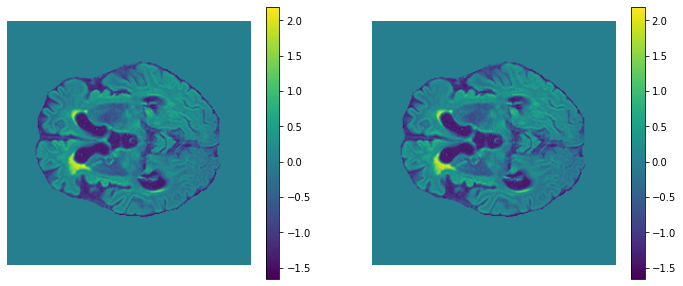

In [6]:
islice=20
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(myflair[:,:,islice])
plt.colorbar()
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(targetflair[:,:,islice])
plt.colorbar()
plt.axis(False)

In [7]:
# how close is my preprocessing to theirs
np.sum(np.abs(targetflair-myflair))

0.0

In [8]:
myflair.shape

(230, 230, 48)

In [9]:
def plotbrain(brain, islice):
    plt.imshow(brain[:,:,islice])
    plt.colorbar()
    plt.axis(False)

#### okay lets look at each step individually

In [22]:
num = 0
islice=25
domain = "Utrecht"
original, _ = load_nii_img(f"/media/benp/NVMEspare/datasets/MRI_IP_project/WMH_challenge_dataset/public/{domain}/{num}/orig/FLAIR.nii.gz")
bet, _ = load_nii_img(prep + f"/imgs/{num}_FLAIR_BET.nii.gz")
resample, _ = load_nii_img(prep + f"/imgs/{num}_FLAIR.nii.gz")
normalize, _ = load_nii_img(prep + f"/imgs/{num}_FLAIR_NORMALIZE.nii.gz")
aim, _ = load_nii_img(target + f"/imgs/{num}_FLAIR.nii.gz")

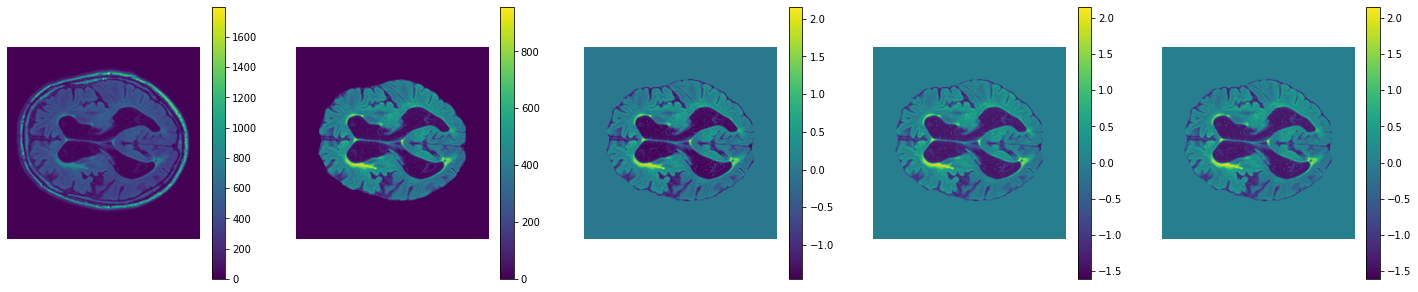

In [23]:
plt.figure(figsize=(25, 5))
plt.subplot(1,5,1)
plotbrain(original, islice)
plt.subplot(1,5,2)
plotbrain(bet, islice)
plt.subplot(1,5,3)
plotbrain(normalize, islice)
plt.subplot(1,5,5)
plotbrain(resample, islice)
plt.subplot(1,5,4)
plotbrain(aim, islice)
plt.show()

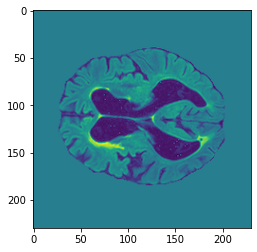

In [24]:
# the problem seems to be todo with the cutoff value... Can I automatically infer cutoff...?
plt.imshow((resample)[:,:,islice])

In [25]:
def get_brain_mean_std(whole_img3D, cutoff=0.01):
    brain_locs = whole_img3D > cutoff # binary map, 1 for included
    brain3D = whole_img3D[brain_locs]
    
    mean = np.mean(brain3D)
    std = np.std(brain3D)
    
    return mean, std, brain_locs

def normalize_brain(whole_img3D, cutoff=0.01):
    mean, std, brain_locs = get_brain_mean_std(whole_img3D, cutoff)
    whole_img3D[brain_locs] = (whole_img3D[brain_locs] - mean) / std

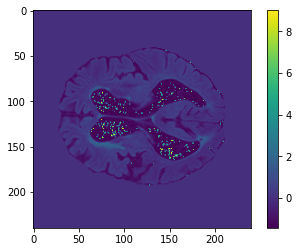

In [26]:
copy = np.copy(bet)
normalize_brain(copy, cutoff=10)
#copy[copy<-1] = -1
plt.imshow(copy[:,:,islice])
plt.colorbar()

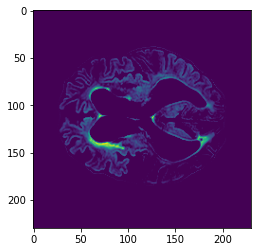

In [27]:
copy = np.copy(resample)
copy[copy<0] = 0
plt.imshow(copy[:,:,islice])

(-0.5, 229.5, 229.5, -0.5)

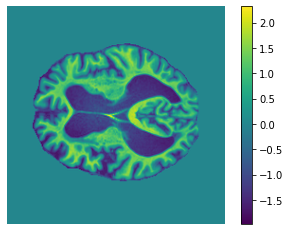

In [28]:
plt.imshow(myt1[:,:,islice])
plt.colorbar()
plt.axis(False)

(-0.5, 229.5, 229.5, -0.5)

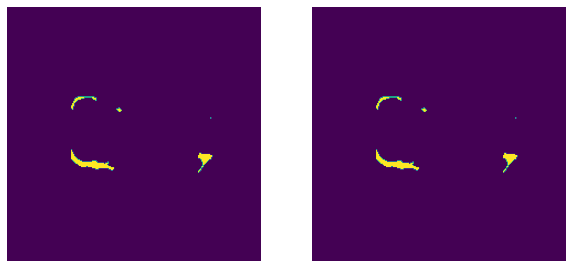

In [29]:
islice2 = 25
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(mylabel[:,:,islice2])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(targetlabel[:,:,islice2])
plt.axis(False)

In [233]:
np.sum(np.abs(mylabel-targetlabel))

0.0